In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

data.head()

In [11]:
data.shape

(7920, 3)

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text preprocessing

In [15]:
import re
import string

Convert to lower case

In [17]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
data['tweet']

0       #fingerprint #pregnancy test https://goo.gl/h1...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

Remove links

In [20]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [21]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuation)

In [25]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [26]:
data['tweet'] = data['tweet'].str.replace(r'\d+','',regex=True)

In [27]:
data['tweet']

0       fingerprint pregnancy test  android apps beaut...
1       finally a transparant silicon case  thanks to ...
2       we love this would you go talk makememories un...
3       im wired i know im george i was made that way ...
4       what amazing service apple wont even talk to m...
                              ...                        
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

Remove stop words

In [29]:
!pip install nltk

In [30]:
import nltk
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
with open('../static/model/corpora/stopwords/english','r') as file:
    stop_words = file.read().splitlines()

In [32]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in stop_words))

In [34]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [36]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [37]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [38]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [39]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Volcabulary

In [41]:
from collections import Counter
vocab = Counter()

In [42]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [43]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [44]:
len(vocab)

15949

In [45]:
tokens = [key for key in vocab if vocab[key] >10]

In [46]:
len(tokens)

1145

# Feature selection

In [48]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=mutual_info_classif,k=1000)

In [49]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

In [50]:
x = data['tweet']
y = data['label']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train.shape

(6336,)

In [53]:
x_test.shape

(1584,)

In [54]:
x_train

4252    cool car wash idea theisland bankholidaymonday...
4428    photo th birthday soni walkman thinkgeek nobod...
7374    ipad biggest pile fuck planet want throw fuck ...
1410    yearbook hmmmmm instagram instagood togeth fri...
7896    piss macbook crash appl compani noth appl macb...
                              ...                        
5226    shana tova jewish newyear everyon may new year...
5390              im sick buy new cell phone charger appl
860     want download free iphon app today spread styl...
7603    photo nikosx iphon beach holiday bw iphon blac...
7270    got iphon hehe iphon appl new final seb wont l...
Name: tweet, Length: 6336, dtype: object

In [55]:
x_test

4896    photo caus dress today  boyfriend dressedup c...
7539    skullcandi product brutal headphon alway stop ...
1677    sunset today zeeland samsung mobil samsung sun...
1964    god playstat share featur cut clip earli want ...
3025    awe he da bestest boyfriend ilovey cute cuti a...
                              ...                        
1419    today meee birthday cake sweet samsung bmw por...
3939                           arualcampbel noth rear end
7834    use new macbookpro last day batteri big time y...
5137    robertwindon cant fix junk appl power cord thr...
4434    use zoooom zoom len iphon dogwalk trevor count...
Name: tweet, Length: 1584, dtype: object

## Vectorization

In [59]:
def vectorizer(dataset,vocabulary):
    vectorized_list = []

    for sentence in dataset:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_new_list = np.asarray(vectorized_list,dtype=np.float32)

    return vectorized_new_list

In [61]:
vectorized_x_train = vectorizer(x_train,tokens)

In [63]:
vectorized_x_test = vectorizer(x_test,tokens)

In [65]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
y_train.value_counts()

label
0    4742
1    1594
Name: count, dtype: int64

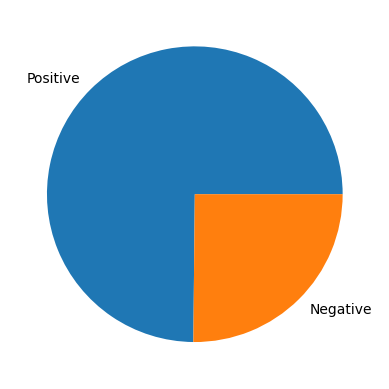

In [93]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

## Handling imbalanced data

In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train,y_train)

In [106]:
vectorized_x_train_smote.shape

(9484, 1145)

In [110]:
y_train_smote.value_counts()

label
0    4742
1    4742
Name: count, dtype: int64